In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
import os

DATASET_PATH = './preprocessed'
IMAGE_EXTENSION = '.jpg'
EXPECTED_NUM_LETTERS = 5

In [40]:

def load_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return None
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def extract_label_from_filename(filename):
    match = re.match(r'([a-zA-Z0-9]{5})\.jpg', filename)
    if match:
        return match.group(1)
    return None

def get_aspect_ratio(contour):
    #Calculates the aspect ratio of a contour
    x, y, w, h = cv2.boundingRect(contour)
    if h > 0:
        return float(w) / h
    return 0.0

def simple_character_segmentation_improved(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Threshold to find darker pixels (adjust threshold value as needed)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

    # Find connected components
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area
    min_char_area = 30
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_char_area]

    # Filter contours based on a more reasonable aspect ratio
    min_aspect = 0.2 
    max_aspect = 1.3
    filtered_contours = [cnt for cnt in filtered_contours if get_aspect_ratio(cnt) > min_aspect and get_aspect_ratio(cnt) < max_aspect]

 
    filtered_contours = sorted(filtered_contours, key=cv2.contourArea, reverse=True)[:EXPECTED_NUM_LETTERS]

    characters = []
    for contour in filtered_contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 5 and h > 10: 
            characters.append(((x, y, w, h), image[y:y + h, x:x + w]))

 
    characters.sort(key=lambda item: item[0][0])

    return characters

def visualize_segmentation(image, characters):
    #Draw bounding boxes
    output_image = image.copy()
    for (x, y, w, h), _ in characters:
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return output_image

Processing image: 111J8.jpg, Label: 111J8
Found 3 potential characters.


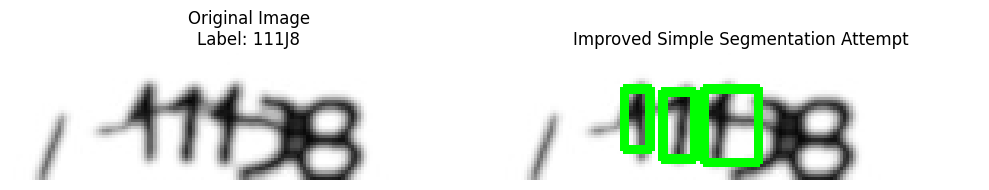

Processing image: 111XM.jpg, Label: 111XM
Found 2 potential characters.


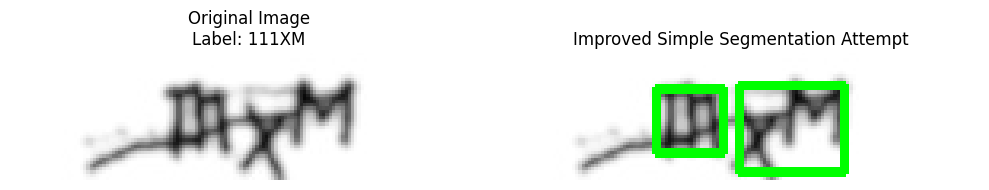

Processing image: 113dk.jpg, Label: 113dk
Found 2 potential characters.


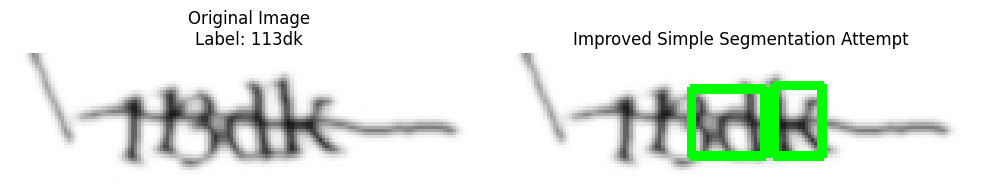

Processing image: 113EV.jpg, Label: 113EV
Found 0 potential characters.


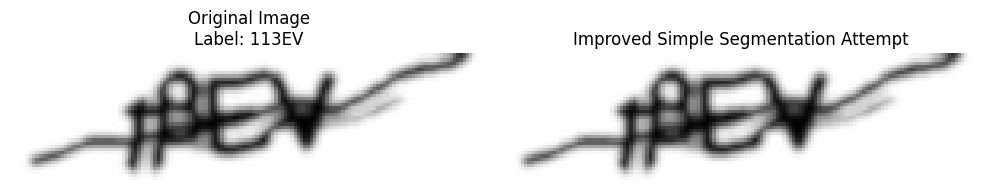

Processing image: 113sB.jpg, Label: 113sB
Found 2 potential characters.


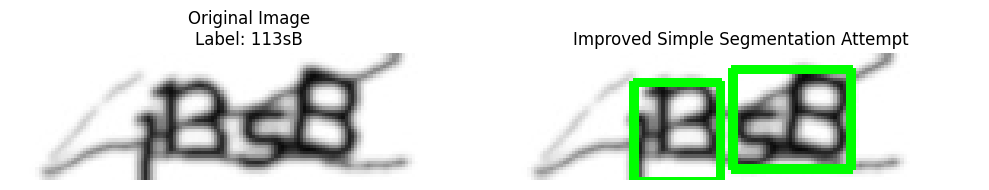

Processing image: 114ty.jpg, Label: 114ty
Found 0 potential characters.


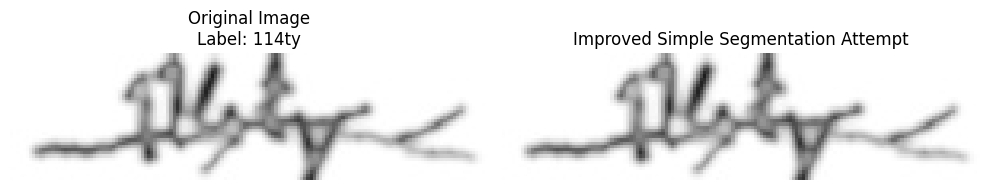

Processing image: 115rB.jpg, Label: 115rB
Found 0 potential characters.


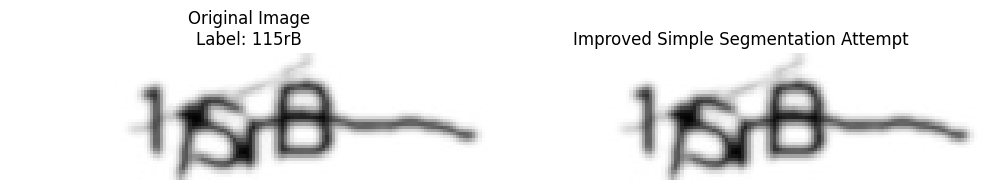

Processing image: 116gw.jpg, Label: 116gw
Found 0 potential characters.


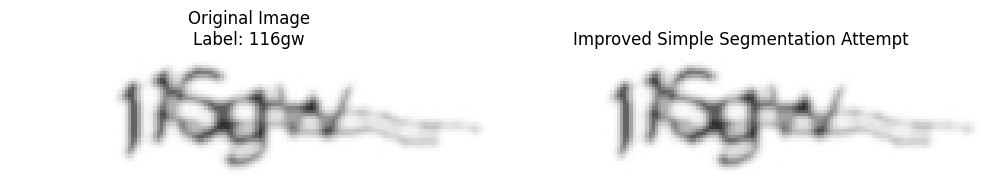

Processing image: 116OC.jpg, Label: 116OC
Found 0 potential characters.


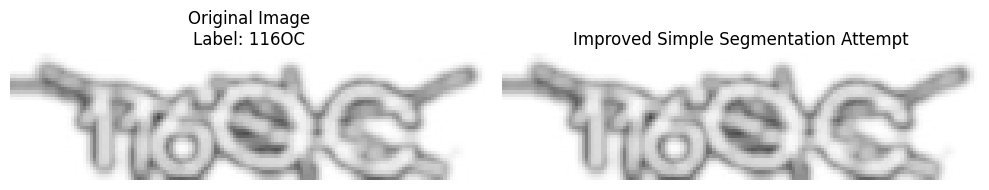

Processing image: 119bg.jpg, Label: 119bg
Found 0 potential characters.


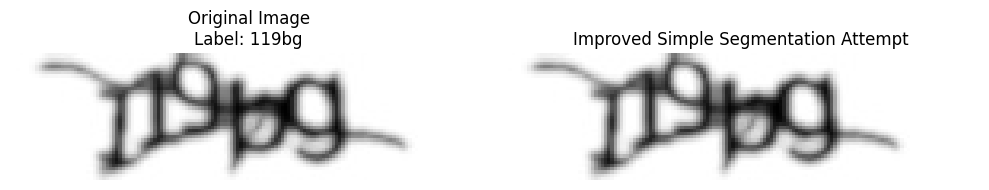

Processing image: 11AvS.jpg, Label: 11AvS
Found 1 potential characters.


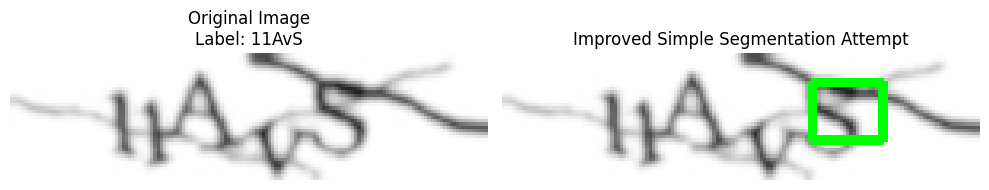

Processing image: 11AWu.jpg, Label: 11AWu
Found 0 potential characters.


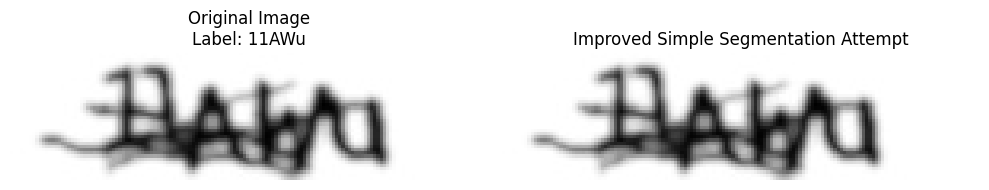

Processing image: 11bav.jpg, Label: 11bav
Found 2 potential characters.


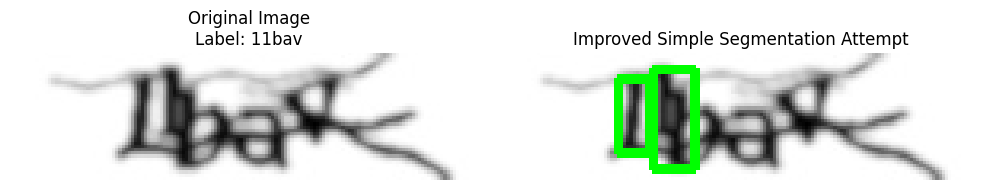

Processing image: 11Cbx.jpg, Label: 11Cbx
Found 0 potential characters.


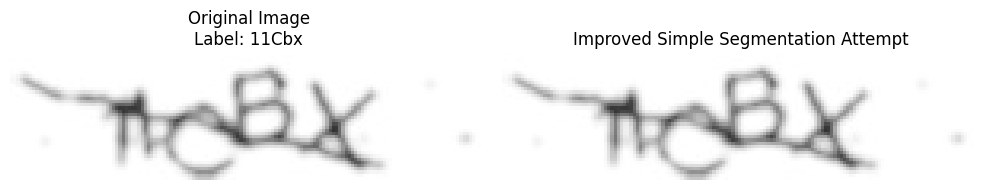

Processing image: 11CgC.jpg, Label: 11CgC
Found 0 potential characters.


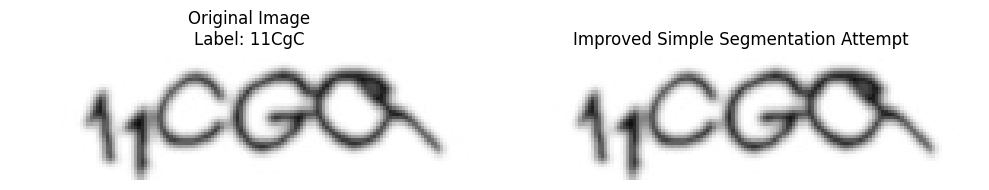

In [42]:
# --- Main Script ---
if __name__ == "__main__":
    if not os.path.exists(DATASET_PATH):
        print(f"Error: Dataset path not found at: {DATASET_PATH}")
        print(f"Please ensure the DATASET_PATH is correct.")
        exit()

    image_files = [f for f in os.listdir(DATASET_PATH) if f.endswith(IMAGE_EXTENSION)]

    if not image_files:
        print(f"Error: No image files with extension '{IMAGE_EXTENSION}' found in '{DATASET_PATH}'.")
        exit()

    for image_name in image_files[:15]:
        image_path = os.path.join(DATASET_PATH, image_name)
        image = load_image(image_path)
        label = extract_label_from_filename(image_name)

        if image is not None and label is not None:
            print(f"Processing image: {image_name}, Label: {label}")


            segmented_characters = simple_character_segmentation_improved(image)
            print(f"Found {len(segmented_characters)} potential characters.")

            # Visualize the segmentation
            output_visualization = visualize_segmentation(image, segmented_characters)

            # Display the results
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title(f"Original Image\nLabel: {label}")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(output_visualization)
            plt.title("Improved Simple Segmentation Attempt")
            plt.axis('off')

            plt.tight_layout()
            plt.show()